# Instruções da prova

- Renomear o notebook para C209-PV1-NOME_SOBRENOME_MATRICULA
- Enviar no teams a pasta com todas as mídias zipada com o nome "NOME_SOBRENOME_MATRICULA.zip"

# Parte Teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas, escreva suas respostas nos campos disponíveis com um '#" na frente de seu texto

1 - Imagens negativas são resultantes da operação "AND" entre duas imagens

In [ ]:
# F -> imagens negativas são o resultado da operação NOT

2 - Imagens binárias há somente dois valores possíveis, normalmente sendo preto e branco

In [ ]:
# V

3 - Algumas imagens podem ter um quarto canal chamado Alpha que representa a opacidade do pixel

In [ ]:
# V

4 - Aplicar uma "Reflexão" em uma imagem significa mudar as dimensões dela, em outras palavras, a imagem ou é "esticada" ou é "encolhida".

In [ ]:
# F -> "Reflexão" é quando realizamos uma operação de inversão da imagem com relação ao eixo x ou y ou ambos

5 - As operações lógicas realizadas em imagens são: E (AND), OU (OR), NÃO (NOT) e XOU (XOR).

In [ ]:
# V

# Parte Prática

### Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Exibição de imagens

```
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
```

### Reflexão 


##### Alt1
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_y = -i #Espelha o valor de x
        new_x = -j #Espelha o valor de y
        mario_refl[new_y, new_x] = mario[i, j]
```

##### Alt2
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
mario_refl[::1, ::-1] = mario
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Histograma em gray

```
def histogram_gray(img):
    (l,c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)
    
    for i in range(l):
        for j in range(c):
            intensity = img[i,j]
            histogram[intensity] += 1
    
    return histogram
```
#### Mostrar o Histograma:

```
def show_histogram_gray(img):
    histogram = histogram_gray(img)
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
```

**1 -** Importe as bibliotecas que serão usadas

In [2]:
import matplotlib.pyplot as plt  # utilizada para exibir imagens e gráficos
import numpy as np               # realização de conversão de imagens em arrays para manipulação
from PIL import Image            # é utilizada para operações básicas em imagens

**2 -** Abra as imagens sid.jpg e disfarce.jpg, retire o canal alpha, exiba essas imagens e mostre o formato de cada uma

(400, 400, 3)
(200, 200, 3)


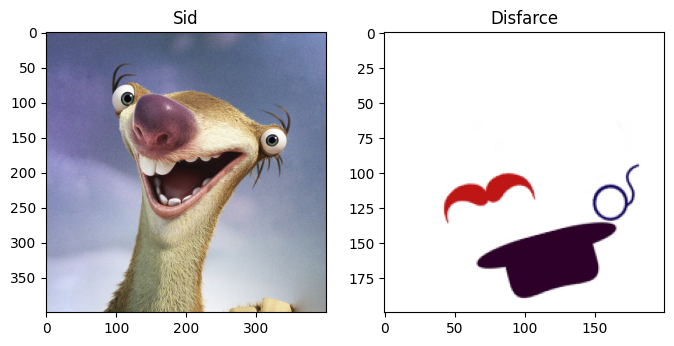

In [3]:
# importanto as imagens em forma de numpy array e retirando o canal alpha
img_sid = np.array(Image.open('sid.jpg'))[:,:,:3]
img_disfarce = np.array(Image.open('disfarce.jpg'))[:,:,:3]


# mostrando as imagens na tela
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Sid')
plt.imshow(img_sid)
plt.subplot(2,2,2)
plt.title('Disfarce')
plt.imshow(img_disfarce)

# dimensões das imagens
print(img_sid.shape)  
print(img_disfarce.shape)

**3 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na **imagem "disfarce"** para que fique do mesmo tamanho da imagem "sid". Exiba o resultado.

C:\Users\mathe\AppData\Local\Temp\ipykernel_3604\874650289.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


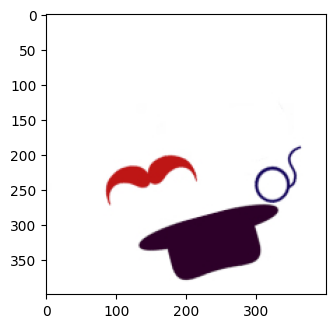

In [5]:
def escolona(img,sx,sy):     # passa como parâmetro a imagem a ser escolonada e as dimensões de escalonamento sx e sy

    # como é uma imagem matricial, podemos usar as suas linhas e colunas para "pegar" os pixels e escalonar

    (l, c ,p) = img.shape    # define as linhas, colunas e pixels da imagem

    (ls, cs) = (l*sx,c*sy)   # redefine a escala com base nas dimensões que foram passadas

    # imagem de somente zeros em seus pixels -> "zerada"
    img_escolonada = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    # passando por todos os pixels da imagem com as dimensões novas, por isso esta usando o ls e cs
    for i in range(ls):         # passando por todas as linhas
        for j in range(cs):     # passando pelas colunas dessa linha
            new_x= int(np.floor(i * (l / ls)))      # nova coordenada x do pixel
            new_y = int(np.floor(j * (c / cs)))     # nova coordenada y do pixel

            img_escolonada[i, j] = img[new_x, new_y]    # definindo os pixel da imagem zerada com os novos
            
    return img_escolonada

# chama a função de escalonamento e passa a imagem de disfarce
img_disfarce_escalonada = escolona(img_disfarce,2,2)

# plotando a imagem escalonada do disfarce
plt.figure(figsize=(8,8))
plt.title('Disfarce escalonado')
plt.subplot(2,2,1)
plt.imshow(img_disfarce_escalonada)

**4 -** Crie uma função que realize a reflexão no eixo x. Essa função deve receber uma **imagem como parâmetro** e **retornar uma imagem refletida no eixo x**. Aplique essa função na **imagem "disfarce" resultando da questão anterior**.

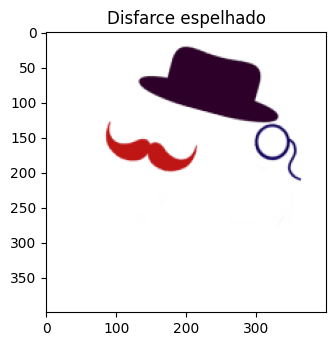

In [11]:
def espelha(img):   # função que realiza o espelhamento no eixo x

    # imagem de somente zeros em seus pixels -> "zerada", já pega o shape da imagem da questão anterior
    img_refletida = np.zeros(shape=img.shape, dtype=np.uint8)


    (l,c,p) = img.shape     # define as linhas, colunas e pixels da imagem

    # passando pelas linhas
    for i in range(l):
        new_x = -i      # espelha o valor de x

        # redefine a posição do pixel
        img_refletida[new_x] = img[i]

    return img_refletida

# chamando a função que fara o espelhamento
img_disfarce_refletida = espelha(img_disfarce_escalonada)

# plotando a imagem espelhada do disfarce escalonado
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Disfarce espelhado')
plt.imshow(img_disfarce_refletida)

**5 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como **parâmetro uma imagem e retorne uma imagem em greyscale**. Aplique essa função na **imagem "disfarce" resultante da questão 4.**

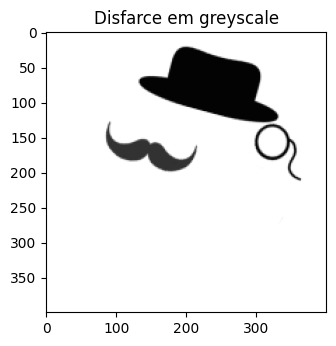

In [19]:
def gray_scale(img):    # função que aplica o greyscale na imagem passando como parâmetro

    # nova imagem realizando o greysacele na imagem que for passada
    img_grey = (

        img[:,:,0] * 0.2126 + 
        img[:,:,1] * 0.7152 + 
        img[:,:,2] * 0.0722
        
        ).astype(np.uint8)
    
    return img_grey

# chamando a função que irá realizar o greyscale
img_disfarce_gray = gray_scale(img_disfarce_refletida)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Disfarce em greyscale')
plt.imshow(img_disfarce_gray,cmap="gray")

**6 -** Crie uma função para transformar uma imagem grayscale em uma imagem binária, que receba como **parâmetro uma imagem e o threshhold** para realizar a operação e retorne uma imagem binária. Aplique essa função na imagem resultante da **etapa anterior com threshold de valor 200** e mostre o resultado.

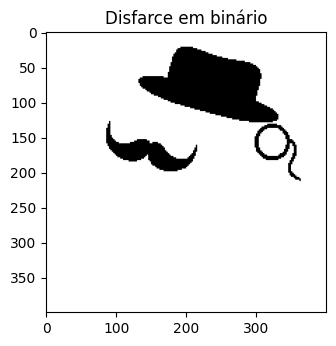

In [20]:
def binaria(img, threshold):     # função que realiza o binariamento da imagem

    (l,c) = img.shape           # pega o tamanho da imagem

    # imagem de somente zeros em seus pixels -> "zerada"
    img_binaria = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
    
    for i in range(l):      # passando por todas as linhas
        for j in range(c):  # passando pelas colunas dessa linha
            
            # se for um pixel com valor menor que o threshold, transforma ele em um pixel branco
            if img[i,j] > threshold: 
                img_binaria[i,j,:] = 255 

            # caso contrário em um pixel preto
            else: 
                img_binaria[i,j,:] = 0

    return img_binaria

# chamando a função que realiza o binariedade na imagem que foi passada
# o segundo parâmetro passado é a taxa de threshold
img_disfarce_binaria = binaria(img_disfarce_gray, 200)    

# plotando a imagem do disfarce em greyscale em binário
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Disfarce em binário')
plt.imshow(img_disfarce_binaria)

**7 -** Realize o mascaramento (lógica E) entre as imagens da questão 6 e a imagem "sid", exiba o resultado.

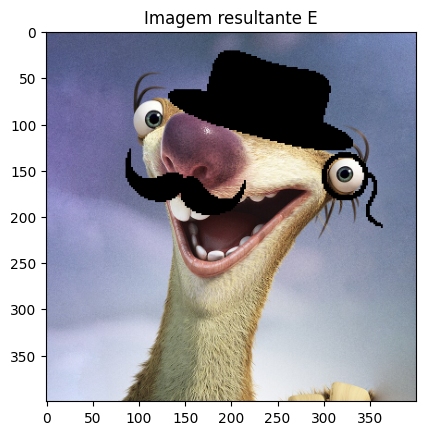

In [21]:
# aplicando a lógica E(&) entre as duas imagens
img_resultante_and = img_sid & img_disfarce_binaria

# plotando o resultado da operação E nas imagens
plt.title('Imagem resultante E')
plt.imshow(img_resultante_and)

**8 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [18]:
# salvando a imagem no disco/pasta em que o código .ipynb está
Image.fromarray(img_resultante_and).save("resultado.jpg")

# Ponto Extra

**9 - ( Ponto Extra )** Passe a imagem resultante (questão 7) na função de grayscale (questão 5) e crie uma função para mostrar seu histograma.

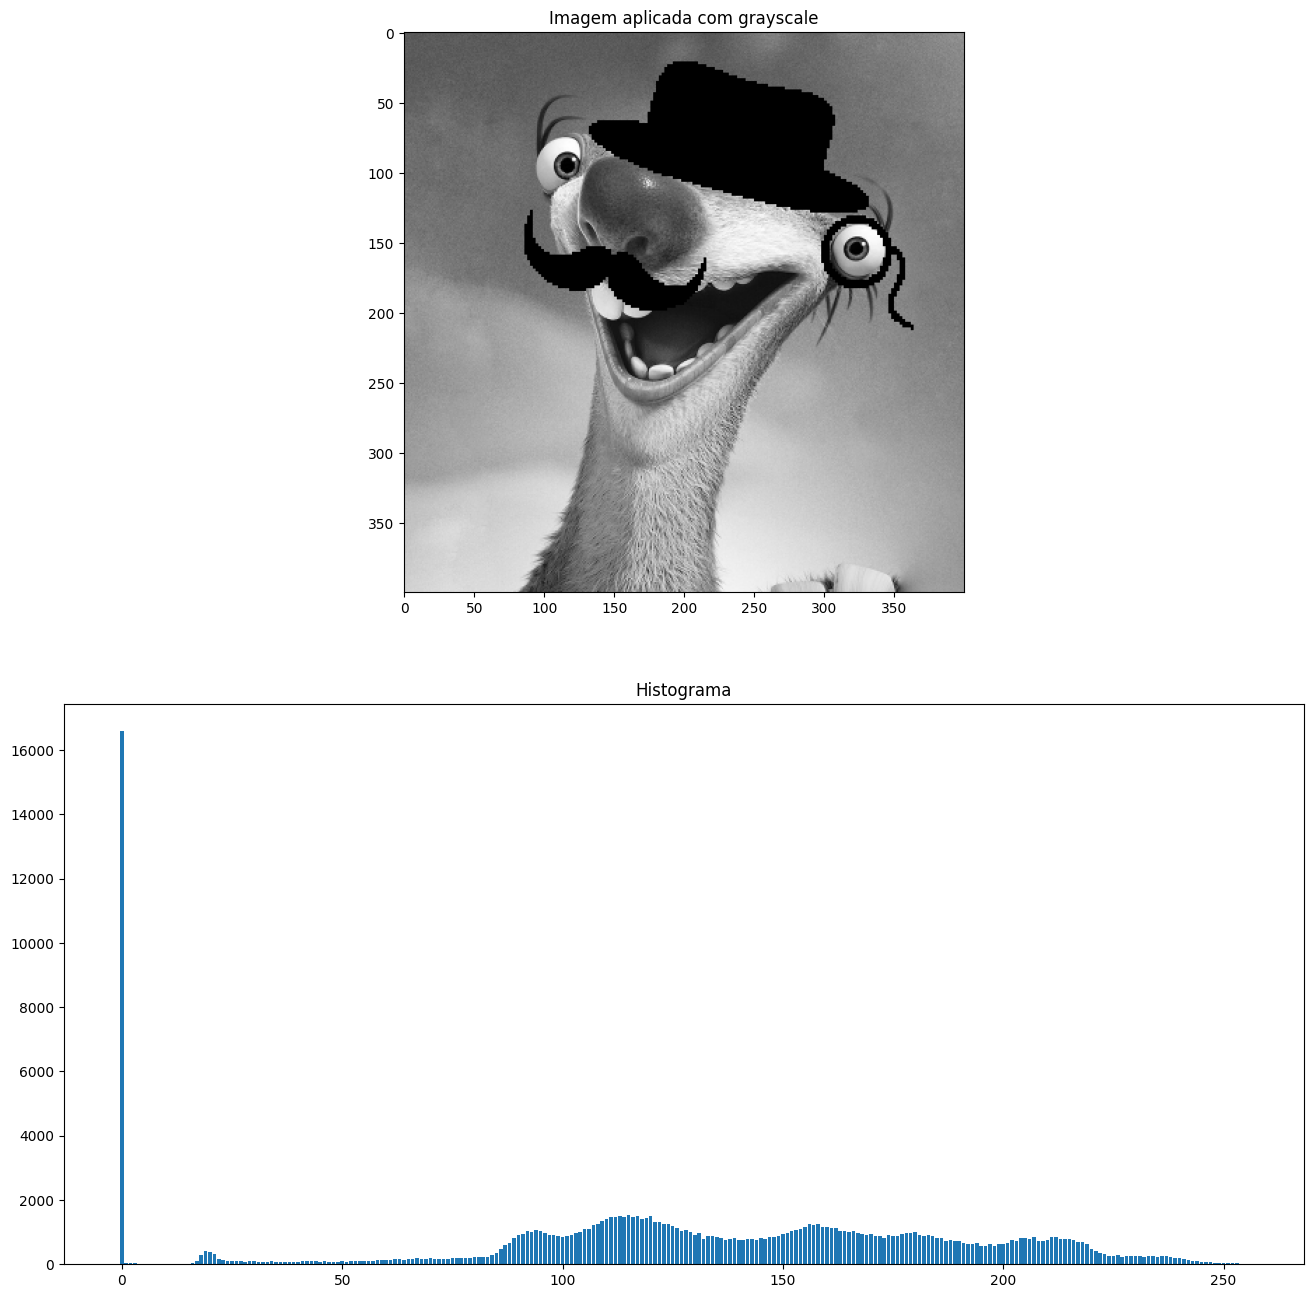

In [24]:
def histogram_gray(img):    # cria o gráfico do histograma

    (l, c) = img.shape      # pega o shape(tamanho) da imagem, linhas e colunas

    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):   # função que realiza o histograma da imagem passada

    histogram = histogram_gray(img)     # chama a função que cria o histograma da imagem em grayscale

    # plota a imagem resultante e o histograma dessa imagem
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.title('Imagem aplicada com grayscale')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.title('Histograma')
    plt.bar(range(256), histogram)

# chama a função que realiza a grayscale na imagem resultante E
img_resultante_gray = gray_scale(img_resultante_and)

# chama a função que realiza o histograma da imagem passada em grayscale
show_histogram_gray(img_resultante_gray)